In [67]:
import json
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from collections import defaultdict

In [68]:

with open('./win5_result.json' , 'r') as jsonf:
    result_json = json.load(jsonf)
with open('./win5_result_detail.json' , 'r') as jsonf:
    result_detail_json = json.load(jsonf)

In [69]:
x = len(result_json['win5_data_list'])
x_axis = [i for i  in range(1,x+1)]
x_axis

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [70]:
def kanji_yen_to_number(kanji_yen):
    oku = 0
    man = 0
    en = 0
    if '億' in kanji_yen:
        temp = kanji_yen.split('億')
        oku = int(temp[0]) * 100000000
        kanji_yen = temp[1]
    if '万' in kanji_yen:
        temp = kanji_yen.split('万')
        man = int(temp[0]) * 10000
        kanji_yen = temp[1] 
    en = int(kanji_yen.rstrip('円'))
    res = oku + man + en
    return res
        
        

In [71]:
populuar_sum = []
odds_sum = []
refunds = []
refunds_kanji = []
jockey_win_nums = defaultdict(int)
for data in result_json['win5_data_list']:
    print('Start target win5 ' + data['win5_id'])
    refund = data['refund']
    win5_detail_dict = result_detail_json['win5_data_race_detail']
    odds_5race_sum = 0
    for race_num in range(1,6): 
        target_data = next((item for item in win5_detail_dict if item["race_id"] == data['win{}_race_id'.format(race_num)]), None)
        print(target_data['win_horse_age'])
        print(target_data['win_horse_jockey_weight'])
        print(target_data['win_horse_jockey'])
        jockey_win_nums[target_data['win_horse_jockey']]+=1
        print(target_data['win_horse_time'])
        print(target_data['win_horse_odds'])
        odds_5race_sum += float(target_data['win_horse_odds'])
        print(target_data['win_horse_home_center'])
        print(target_data['win_horse_trainer'])
    odds_sum.append(odds_5race_sum)
    refunds_kanji.append(refund)
    refunds.append(kanji_yen_to_number(refund))
    populuar_sum.append(sum(data['popular']))

Start target win5 20240106
牡6
58.0
丹内
2:11.8
12.7
美浦
宮田
牡5
54.0
酒井
3:05.3
6.2
栗東
本田
牡3
57.0
キング
1:32.5
3.8
栗東
松永幹
牡4
54.0
岩田康
1:33.8
16.5
栗東
中竹
牡5
56.0
津村
1:58.9
7.8
栗東
田中克
Start target win5 20240107
牡5
58.0
ルメー
2:00.0
5.2
美浦
池上
牡5
58.0
横山典
1:22.5
4.5
栗東
安田隆
牡5
57.0
大野
1:52.9
5.9
美浦
高木
牡5
57.0
川田
1:24.5
11.2
栗東
奥村豊
牝3
55.0
西村淳
1:34.0
12.6
栗東
杉山佳
Start target win5 20240108
牡4
57.0
横山武
2:38.9
3.9
美浦
加藤士
牡5
58.0
岩田望
2:00.3
21.9
栗東
上村
牡4
56.0
横山和
1:54.3
2.4
栗東
野中
牡3
57.0
川田
1:34.5
4.9
栗東
吉岡
セ6
58.0
大野
1:07.8
15.4
美浦
大竹
Start target win5 20240114
牡4
57.0
武豊
1:51.8
1.3
栗東
斉藤崇
牡5
56.0
戸崎圭
1:10.8
6.4
栗東
岡田
牡6
58.0
斎藤
1:44.2
4.9
栗東
池添
牡5
57.0
菅原明
2:23.7
4.1
美浦
中野
牡3
57.0
横山典
2:00.5
11.5
栗東
安田翔
Start target win5 20240121
牡5
58.0
酒井
1:10.2
14.8
栗東
吉田
牡6
58.0
松岡
1:50.6
12.3
栗東
森秀
牡5
57.0
富田
1:42.2
3.4
栗東
平田
牡6
57.0
坂井
1:49.2
5.5
栗東
上村
セ6
57.0
キング
2:16.6
6.5
美浦
堀
Start target win5 20240128
牡4
57.0
ルメー
2:12.7
4.3
美浦
木村
牡4
57.0
川田
1:32.5
2.3
栗東
高橋忠
牡4
56.0
丹内
1:09.0
13.7
栗東
寺島
牡4
57.5
西村淳
1:07.7
3.3


In [95]:
sorted_jockey_win_nums = sorted(jockey_win_nums.items(),  key = lambda item : item[1], reverse=True)

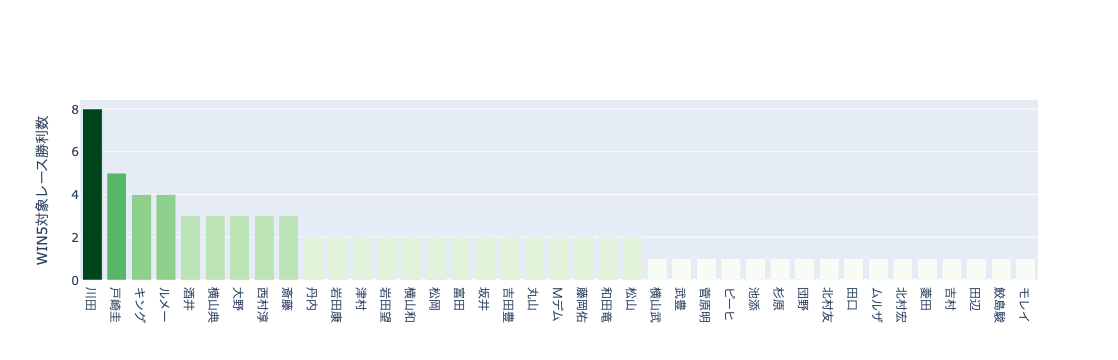

In [122]:
jockey_names = [i[0] for i in sorted_jockey_win_nums]
jockey_wins = [i[1] for i in sorted_jockey_win_nums]
fig = go.Figure(
        data=go.Bar(
            x=jockey_names,
            y=jockey_wins,
            name="勝利数",
            marker=dict(color=jockey_wins,
                colorscale=px.colors.sequential.Greens)
        )
    )
fig.update_layout(
    yaxis=dict(
        title=dict(text="WIN5対象レース勝利数"),
        side="left"
    ),
    # plot_bgcolor='Black'
)
fig.show()

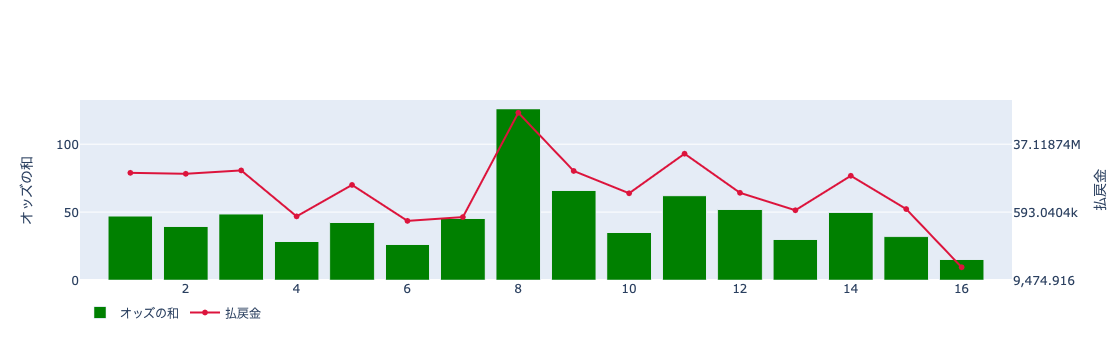

In [74]:

fig = go.Figure(
        data=go.Bar(
            x=x_axis,
            y=odds_sum,
            name="オッズの和",
            marker=dict(color="green"),
        )
    )

fig.add_trace(
    go.Scatter(
        x=x_axis,
        y=refunds,
        yaxis="y2",
        name="払戻金",
        marker=dict(color="crimson"),
        hovertext=refunds_kanji
    )
)
fig.update_layout(
    legend=dict(orientation="h"),
    yaxis=dict(
        title=dict(text="オッズの和"),
        side="left"
    ),
    yaxis2=dict(
        title=dict(text="払戻金"),
        side="right",
        overlaying="y",
        tickmode="sync",
        type='log'
    ),
)
# fig.update_yaxes(type='log')
fig.show()

In [81]:
tmp = sorted(jockey_win_nums.items(),  key = lambda item : item[1], reverse=True)

In [94]:
[j[0] for j in tmp]

['川田',
 '戸崎圭',
 'キング',
 'ルメー',
 '酒井',
 '横山典',
 '大野',
 '西村淳',
 '斎藤',
 '丹内',
 '岩田康',
 '津村',
 '岩田望',
 '横山和',
 '松岡',
 '富田',
 '坂井',
 '吉田豊',
 '丸山',
 'Ｍデム',
 '藤岡佑',
 '和田竜',
 '松山',
 '横山武',
 '武豊',
 '菅原明',
 'ピーヒ',
 '池添',
 '杉原',
 '団野',
 '北村友',
 '田口',
 'ムルザ',
 '北村宏',
 '菱田',
 '吉村',
 '田辺',
 '鮫島駿',
 'モレイ']